In [15]:
from matplotlib import pyplot as plt, patches
import sympy
import numpy as np
from scipy.integrate import solve_ivp

In [3]:
#initilize the symbols
t = sympy.Symbol('t')
r = sympy.Symbol('r')
theta = sympy.Symbol('theta')
phi = sympy.Symbol('phi')
c = sympy.Symbol('c')
R_s = sympy.Symbol('R_s')
x = [t,r,theta,phi]

#initilize the metric
g = sympy.Matrix([[-c*c*(1-R_s/r),0,0,0],[0,1/(1-R_s/r),0,0],[0,0,r**2,0],[0,0,0,r**2*sympy.sin(theta)**2]])
g_inv = g.inv()

#initilize the christoffel symbols
chris = []
for k in range(4):
    chris.append([])
    for i in range(4):
        chris[k].append([])
        for j in range(4):
            #note that in the case of Schwarzschild metric, g is diagonal, so the christoffel symbols are simplified
            chris[k][i].append(sympy.simplify(0.5*g_inv[k,k]*(sympy.diff(g[k,i],x[j])+sympy.diff(g[k,j],x[i])-sympy.diff(g[i,j],x[k]))))


chris_fun = sympy.lambdify((c, R_s, r, theta), chris, modules="numpy")

In [5]:
sympy.Matrix(chris[0])

Matrix([
[                     0, 0.5*R_s/(r*(-R_s + r)), 0, 0],
[0.5*R_s/(r*(-R_s + r)),                      0, 0, 0],
[                     0,                      0, 0, 0],
[                     0,                      0, 0, 0]])

In [6]:
sympy.Matrix(chris[1])

Matrix([
[0.5*R_s*c**2*(-R_s + r)/r**3,                     0,               0,                           0],
[                           0, 0.5*R_s/(r*(R_s - r)),               0,                           0],
[                           0,                     0, 1.0*R_s - 1.0*r,                           0],
[                           0,                     0,               0, (R_s - 1.0*r)*sin(theta)**2]])

In [7]:
sympy.Matrix(chris[2])

Matrix([
[0,     0,     0,                 0],
[0,     0, 1.0/r,                 0],
[0, 1.0/r,     0,                 0],
[0,     0,     0, -0.5*sin(2*theta)]])

In [8]:
sympy.Matrix(chris[3])

Matrix([
[0,     0,              0,              0],
[0,     0,              0,          1.0/r],
[0,     0,              0, 1.0/tan(theta)],
[0, 1.0/r, 1.0/tan(theta),              0]])

In [9]:
#solvable form of the geodesic equation
# return geodesic equation's right hand side
def F(t, y):
    x = np.array(y[0:4])
    xp = np.array(y[4:8])
    right = []
    for i in range(4):
        right.append(sympy.simplify(0))
        for alpha in range(4):
            for beta in range(4):
                right[i] = right[i] - chris_fun(1, 1, x[1], x[2])[i][alpha][beta]*xp[alpha]*xp[beta]
    return np.concatenate((xp, right))

In [39]:
T = 500
t_eval = np.linspace(0, T, int(T * 123 + 1))
initial_value = [0, 10, np.pi/2, 0, 1, 0, 0.015, 0]

sol = solve_ivp(F, [0, T], initial_value, t_eval=t_eval)

Text(0, 0.5, 'x')

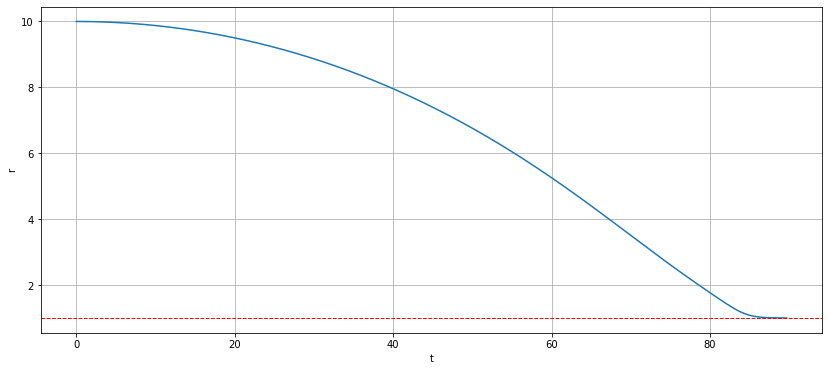

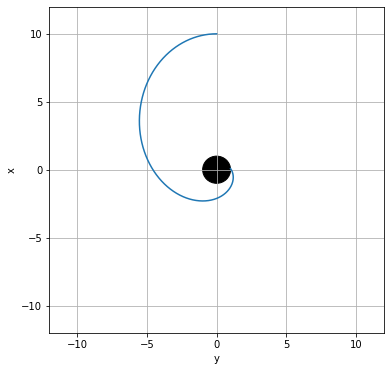

In [40]:
plt.figure(figsize=(14, 6),)
plt.plot(sol.y[0], sol.y[1])
ax = plt.gca()
ax.axhline(1, color="red", ls='--', lw=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('r')

plt.figure(figsize=(6, 6),)
plt.plot(sol.y[1]*np.cos(sol.y[2]), sol.y[1]*np.sin(sol.y[2]))
plt.grid()
plt.xlim(-12, 12)
plt.ylim(-12, 12)
ax = plt.gca()
circle1 = patches.Circle((0, 0), radius=1, color='black')
ax.add_patch(circle1)
plt.xlabel('y')
plt.ylabel('x')

Text(0, 0.5, 'x')

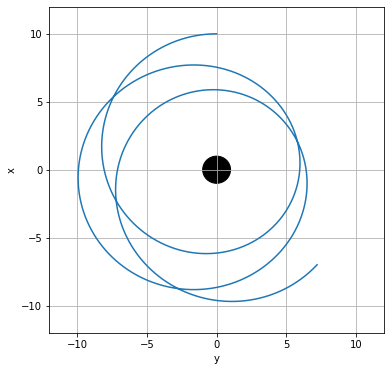

In [41]:
T = 500
t_eval = np.linspace(0, T, int(T * 123 + 1))
initial_value = [0, 10, np.pi/2, 0, 1, 0, 0.02, 0]

sol = solve_ivp(F, [0, T], initial_value, t_eval=t_eval)
plt.figure(figsize=(6, 6),)
plt.plot(sol.y[1]*np.cos(sol.y[2]), sol.y[1]*np.sin(sol.y[2]))
plt.grid()
plt.xlim(-12, 12)
plt.ylim(-12, 12)
ax = plt.gca()
circle1 = patches.Circle((0, 0), radius=1, color='black')
ax.add_patch(circle1)
plt.xlabel('y')
plt.ylabel('x')